In [ ]:
import sys, os
import argparse

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "./../../../../")))
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "./../../../")))

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "")))

In [2]:
from fedml_api.data_preprocessing.cifar10.data_loader import load_partition_data_cifar10
from fedml_api.standalone.fedavg.my_model_trainer_classification import MyModelTrainer as MyModelTrainerCLS
from fedml_api.model.cv.resnet import resnet56

import torch
from torch import nn
from collections import OrderedDict
import torch.nn.functional as F

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import random

In [3]:
dataset = 'cifar10'
data_dir = "./../../../data/cifar10"
partition_method = 'hetero'
# partition_method = 'homo'
partition_alpha = 0.5
client_num_in_total = 10
batch_size = 100
total_epochs = 500
save_model_path = 'model/client_{0}_epochs_{1}.pt'

device = 'cuda:1'
# parser = argparse.ArgumentParser()
# parser.add_argument('--client_optimizer', type=str, default='adam',
#                         help='SGD with momentum; adam')
# parser.add_argument('--epochs', type=int, default=5, metavar='EP',
#                         help='how many epochs will be trained locally')


In [4]:
# random.seed(0)
# np.random.seed(0)
# torch.manual_seed(0)
# torch.cuda.manual_seed_all(0)

In [5]:
train_data_num, test_data_num, train_data_global, test_data_global, \
train_data_local_num_dict, train_data_local_dict, test_data_local_dict, \
class_num = load_partition_data_cifar10(dataset, data_dir, partition_method,
                        partition_alpha, client_num_in_total, batch_size)

INFO:root:*********partition data***************


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:N = 50000
INFO:root:traindata_cls_counts = {0: {0: 125, 1: 101, 2: 25, 3: 202, 4: 1, 5: 788, 6: 21, 7: 875, 8: 745, 9: 1038}, 1: {0: 891, 1: 435, 2: 59, 3: 512, 4: 235, 5: 722, 6: 10, 7: 59, 8: 720, 9: 1500}, 2: {0: 957, 1: 202, 2: 908, 3: 11, 4: 18, 6: 39, 7: 551, 8: 348, 9: 20}, 3: {0: 1366, 1: 824, 2: 310, 3: 180, 4: 919, 5: 164, 6: 52, 7: 79, 8: 145, 9: 467}, 4: {0: 99, 1: 1210, 2: 93, 3: 1567, 4: 256, 5: 466, 6: 294, 7: 225, 8: 18, 9: 1158}, 5: {0: 43, 1: 48, 2: 3097, 3: 47, 4: 557, 5: 177, 6: 2423}, 6: {0: 190, 1: 10, 2: 360, 3: 1245, 4: 492, 5: 880, 7: 554, 8: 737, 9: 168}, 7: {0: 1195, 1: 9, 2: 112, 3: 992, 4: 786, 5: 118, 6: 19, 7: 411, 8: 2200}, 8: {0: 100, 1: 545, 2: 8, 3: 3, 4: 926, 5: 1034, 6: 2, 7: 2246, 8: 86, 9: 648}, 9: {0: 34, 1: 1616, 2: 28, 3: 241, 4: 810, 5: 651, 6: 2140, 8: 1, 9: 1}}


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:train_dl_global number = 500
INFO:root:test_dl_global number = 100
INFO:root:client_idx = 0, local_sample_number = 3921


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 0, batch_num_train_local = 39, batch_num_test_local = 100
INFO:root:client_idx = 1, local_sample_number = 5143


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 1, batch_num_train_local = 51, batch_num_test_local = 100
INFO:root:client_idx = 2, local_sample_number = 3054


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 2, batch_num_train_local = 30, batch_num_test_local = 100
INFO:root:client_idx = 3, local_sample_number = 4506


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 3, batch_num_train_local = 45, batch_num_test_local = 100
INFO:root:client_idx = 4, local_sample_number = 5386


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 4, batch_num_train_local = 53, batch_num_test_local = 100
INFO:root:client_idx = 5, local_sample_number = 6392


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 5, batch_num_train_local = 63, batch_num_test_local = 100
INFO:root:client_idx = 6, local_sample_number = 4636


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 6, batch_num_train_local = 46, batch_num_test_local = 100
INFO:root:client_idx = 7, local_sample_number = 5842


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 7, batch_num_train_local = 58, batch_num_test_local = 100
INFO:root:client_idx = 8, local_sample_number = 5598


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 8, batch_num_train_local = 55, batch_num_test_local = 100
INFO:root:client_idx = 9, local_sample_number = 5522


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 9, batch_num_train_local = 55, batch_num_test_local = 100


In [6]:
class Client(object):
    def __init__(self, client_index, train_data_local_dict, train_data_local_num_dict, test_data_local_dict, device, model):
        self.id = client_index
        self.train_data = train_data_local_dict[self.id]
        self.local_sample_number = train_data_local_num_dict[self.id]
        self.test_local = test_data_local_dict[self.id]
        
        self.device = device
        self.model = model

In [7]:
# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# model = ResNet(ResidualBlock, [6, 6, 6]).to(device)

In [8]:
model = resnet56(class_num=class_num)
client_1 = Client(0, train_data_local_dict, train_data_local_num_dict, test_data_local_dict, device, model)

In [9]:
print(client_1.local_sample_number)

3921


In [10]:
# model_trainer = MyModelTrainerCLS(model)
for n, m in client_1.model.named_modules():
    print(n)


conv1
bn1
relu
layer1
layer1.0
layer1.0.conv1
layer1.0.bn1
layer1.0.conv2
layer1.0.bn2
layer1.0.conv3
layer1.0.bn3
layer1.0.relu
layer1.0.downsample
layer1.0.downsample.0
layer1.0.downsample.1
layer1.1
layer1.1.conv1
layer1.1.bn1
layer1.1.conv2
layer1.1.bn2
layer1.1.conv3
layer1.1.bn3
layer1.1.relu
layer1.2
layer1.2.conv1
layer1.2.bn1
layer1.2.conv2
layer1.2.bn2
layer1.2.conv3
layer1.2.bn3
layer1.2.relu
layer1.3
layer1.3.conv1
layer1.3.bn1
layer1.3.conv2
layer1.3.bn2
layer1.3.conv3
layer1.3.bn3
layer1.3.relu
layer1.4
layer1.4.conv1
layer1.4.bn1
layer1.4.conv2
layer1.4.bn2
layer1.4.conv3
layer1.4.bn3
layer1.4.relu
layer1.5
layer1.5.conv1
layer1.5.bn1
layer1.5.conv2
layer1.5.bn2
layer1.5.conv3
layer1.5.bn3
layer1.5.relu
layer2
layer2.0
layer2.0.conv1
layer2.0.bn1
layer2.0.conv2
layer2.0.bn2
layer2.0.conv3
layer2.0.bn3
layer2.0.relu
layer2.0.downsample
layer2.0.downsample.0
layer2.0.downsample.1
layer2.1
layer2.1.conv1
layer2.1.bn1
layer2.1.conv2
layer2.1.bn2
layer2.1.conv3
layer2.1.bn3


In [11]:
# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

learning_rate = 0.001
# Train the model
def train_model_1(client, epochs):
    total_step = len(client.train_data)
    curr_lr = learning_rate
    
    criterion = nn.CrossEntropyLoss().to(client.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(client.train_data):
            images = images.to(client.device)
            labels = labels.to(client.device)

            # Forward pass
            outputs = client.model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 10 == 0:
                print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                       .format(epoch+1, epochs, i+1, total_step, loss.item()))

        # Decay learning rate
        if (epoch+1) % 200 == 0:
            curr_lr /= 3
            update_lr(optimizer, curr_lr)

In [12]:
# train_model_1(client_1, 100)

In [13]:
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def train_model(client, epochs):
    learning_rate = 0.001
    wd = 0.0001
    
    client.model.to(client.device)
    client.model.train()
    
    criterion = nn.CrossEntropyLoss().to(device)
    
#     optimizer = torch.optim.Adam(client.model.parameters(), lr=learning_rate)
    
    curr_lr = learning_rate
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, client.model.parameters()), lr=curr_lr,
                                         weight_decay=wd, amsgrad=True)
#     optimizer = torch.optim.SGD(client.model.parameters(), 0.1,
#                                 momentum=0.9,
#                                 weight_decay=1e-4)
#     lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
#                                                         milestones=[100, 150], last_epoch=0 - 1)

    epoch_loss = []
    total_step = len(client.train_data)
    for epoch in range(epochs):
        batch_loss = []
        for batch_idx, (x, labels) in enumerate(client.train_data):
            x, labels = x.to(device), labels.to(device)
            client.model.zero_grad()
            log_probs = client.model(x)
            loss = criterion(log_probs, labels)
            loss.backward()

            # to avoid nan loss
#             torch.nn.utils.clip_grad_norm_(client.model.parameters(), 1.0)

            optimizer.step()
            # logging.info('Update Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            #     epoch, (batch_idx + 1) * args.batch_size, len(train_data) * args.batch_size,
            #            100. * (batch_idx + 1) / len(train_data), loss.item()))
            batch_loss.append(loss.item())
            
#             if (batch_idx+1) % 10 == 0:
#                 print("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}".format(epoch+1, epochs, batch_idx+1, total_step, loss.item()))
            
#             lr_scheduler.step()
        
#         if (epoch+1) % 5 == 0:
#             curr_lr /= 2
#             update_lr(optimizer, curr_lr)
        epoch_loss.append(sum(batch_loss) / len(batch_loss))
        print('Client Index = {}\tEpoch: {}\tLoss: {:.6f}'.format(
            client.id, epoch, sum(batch_loss) / len(batch_loss)))

In [30]:
train_model(client_1, 100)

Client Index = 0	Epoch: 0	Loss: 0.160854
Client Index = 0	Epoch: 1	Loss: 0.172566
Client Index = 0	Epoch: 2	Loss: 0.137750
Client Index = 0	Epoch: 3	Loss: 0.125842
Client Index = 0	Epoch: 4	Loss: 0.153692
Client Index = 0	Epoch: 5	Loss: 0.174118
Client Index = 0	Epoch: 6	Loss: 0.134972
Client Index = 0	Epoch: 7	Loss: 0.133487
Client Index = 0	Epoch: 8	Loss: 0.127765
Client Index = 0	Epoch: 9	Loss: 0.132957
Client Index = 0	Epoch: 10	Loss: 0.149804
Client Index = 0	Epoch: 11	Loss: 0.144157
Client Index = 0	Epoch: 12	Loss: 0.126539
Client Index = 0	Epoch: 13	Loss: 0.133755
Client Index = 0	Epoch: 14	Loss: 0.135259
Client Index = 0	Epoch: 15	Loss: 0.126071
Client Index = 0	Epoch: 16	Loss: 0.157877
Client Index = 0	Epoch: 17	Loss: 0.150231
Client Index = 0	Epoch: 18	Loss: 0.135264
Client Index = 0	Epoch: 19	Loss: 0.138283
Client Index = 0	Epoch: 20	Loss: 0.132155
Client Index = 0	Epoch: 21	Loss: 0.135912
Client Index = 0	Epoch: 22	Loss: 0.124361
Client Index = 0	Epoch: 23	Loss: 0.121862
Cl

In [31]:
# modules = list(client_1.model.modules()[:-1])
for name, m in client_1.model.named_modules():
    if name == 'layer3.5.relu':
        print(m)
# print(modules)

ReLU(inplace=True)


In [32]:
def extract_cnn_feature(model, input, modules):
#     model.eval()
    outputs = OrderedDict()
    handles = []
#     outputs = None
    for m in modules:
#         print(id(m))
        outputs[id(m)] = None
        def func(m, i, o): outputs[id(m)] = o.data.cpu()
        handles.append(module.register_forward_hook(func))
        
    model(input)
    for h in handles:
        h.remove()
#     print(outputs.values())
    #return: [1, 64, 256, 8, 8]
    return list(outputs.values())[0]

def extract_features(model, data_loader,device, module):
    model.eval()
    
    features = []
    labels = []
    
    with torch.no_grad():
        for batch_idx, (x, l) in enumerate(data_loader):
            x, l = x.to(device), l.to(device)
            
            #[batch_size, channel, w, h]
            outputs = extract_cnn_feature(model, x, module)
#             features.append(outputs)
#             labels.append(labels)
#             print(len(outputs))

            for output, label in zip(outputs, l):
#                 features[batch_idx] = output
#                 labels[batch_idx] = label
#                 print(output.shape)
                # output: [64, 256, 8, 8]
                features.append(output.view(-1, 256*8*8))
                labels.append(label)
    
#             print(len(outputs))
#             print(outputs[0].shape)
    
    #[79, 64, 256, 8, 8]
    return features, labels
            
module = None
for name, m in client_1.model.named_modules():
    if name == 'layer3.5.relu':
        module = m
print(module)

# features, labels = extract_features(client_1.model, test_data_global, device, [module])
features, labels = extract_features(client_1.model, client_1.train_data, device, [module])

ReLU(inplace=True)


In [33]:
from collections import Counter
ls = np.array([int(l) for l in labels])
counter_result = Counter(ls)
print(Counter(ls))

Counter({9: 1034, 7: 873, 5: 781, 8: 742, 3: 199, 0: 124, 1: 101, 2: 25, 6: 20, 4: 1})


In [34]:
# class imbalance sample
# ks = counter_result.keys()
def get_index(lst, item):
    return [i for i in range(len(lst)) if lst[i]==item]

sampled_idx = []
for k, v in counter_result.items():
#     print(f'{k}-{v}')
    idx = get_index(ls, k)
#     print(len(idx))
    sampled_idx.extend(random.sample(idx, 100 if v>=100 else v))
    
# print(len(sampled_idx))

746


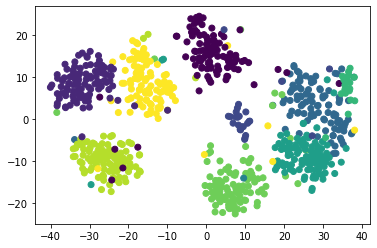

In [35]:
# print(shape(features))
# print(np.array(features[0][0]))
# print(features[0])
# print(np.array(features[0][0]).shape)
# print(torch.stack(labels).shape)

plot_features = torch.squeeze(torch.stack(features),dim=1)
plot_features = plot_features.numpy()[sampled_idx]
# for idx in sampled_idx:
#     plt_f.append(plot_features[idx])
print(len(plot_features))
source_features = F.normalize(torch.from_numpy(plot_features), dim=1)


tsne = TSNE(n_components=2, init='pca', perplexity=30)
Y = tsne.fit_transform(source_features)

plt.scatter(Y[:, 0], Y[:, 1], c=ls[sampled_idx])
plt.show()

In [20]:
torch.save(client_1.model.state_dict(), str.format(save_model_path, 0, 200))

In [21]:
model2 = resnet56(class_num=class_num)
model2.load_state_dict(torch.load(str.format(save_model_path, 0, 200)))

<All keys matched successfully>

In [22]:
input = torch.rand(1, 3, 32, 32).to(device)
print(client_1.model(input) - model2(input))



RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same